In [1]:
#!pip install pycaret
#!pip install numpy==1.21.5

# Modelos de analítica avanzada

In [2]:
from sklearn import  tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Carga de datos

In [3]:
url_file = "https://raw.githubusercontent.com/zng489/Decision_trees_and_Random-Forest-madfhantr-/main/madfhantr.csv"
df_raw = pd.read_csv(url_file)
df_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_raw.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [6]:
def preprocessing_madfhantr(df):
  # eliminamos nans
  df = df.dropna()
  # creamos columna con nombres target
  df["targetNames"] = df["Loan_Status"]
  # variables categóricas que tenemos que convertir
  cat_vars = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
  for cat_var in cat_vars:
    df.loc[:,cat_var] = pd.Categorical(df[cat_var]).codes
  # renombramos la columna target
  df = df.rename(columns={"Loan_Status":"target"})
  df = df.set_index("Loan_ID")
  return df



In [7]:
df = preprocessing_madfhantr(df_raw)


<ipython-input-6-19622b6e91dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["targetNames"] = df["Loan_Status"]
<ipython-input-6-19622b6e91dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,cat_var] = pd.Categorical(df[cat_var]).codes
<ipython-input-6-19622b6e91dc>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colum

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target,targetNames
Loan_ID,,,,,,,,,,,,,
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,N
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,Y
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,Y
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,Y
LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,Y


# Exploración de datos

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int8   
 1   Married            480 non-null    int8   
 2   Dependents         480 non-null    int8   
 3   Education          480 non-null    int8   
 4   Self_Employed      480 non-null    int8   
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int8   
 11  target             480 non-null    int8   
 12  targetNames        480 non-null    object 
dtypes: float64(4), int64(1), int8(7), object(1)
memory usage: 29.5+ KB


In [10]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


# Modelización
Creamos un árbol de regresión haciendo un train/test split del 30%.

In [11]:
targetCol = "target"
featuresCols = [col for col in df.columns if col not in ["target","targetNames"]]
X, y = df[featuresCols],df[targetCol]

In [12]:

featuresCols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
print(X_train.shape)
print(X_test.shape)


(360, 11)
(120, 11)


Inicializamos el modelo de clasificación del árbol de decisión con los parámetros por defecto

In [15]:

tree.DecisionTreeClassifier?

In [16]:

clf = tree.DecisionTreeClassifier(criterion="entropy")

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [17]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int8)

# Evaluación
## Métricas del modelo

In [18]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21 22]
 [17 60]]
              precision    recall  f1-score   support

           0       0.55      0.49      0.52        43
           1       0.73      0.78      0.75        77

    accuracy                           0.68       120
   macro avg       0.64      0.63      0.64       120
weighted avg       0.67      0.68      0.67       120



In [19]:
y_pred_tr =  clf.predict(X_train)
print(confusion_matrix(y_train,y_pred_tr))
print(classification_report(y_train, y_pred_tr))

[[105   0]
 [  0 255]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       255

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



## Interpretabilidad del árbol
Visualizamos el modelo. Hay una función integrada que permite hacer un plot del árbol, sin embargo mucha gente usa graphviz también.

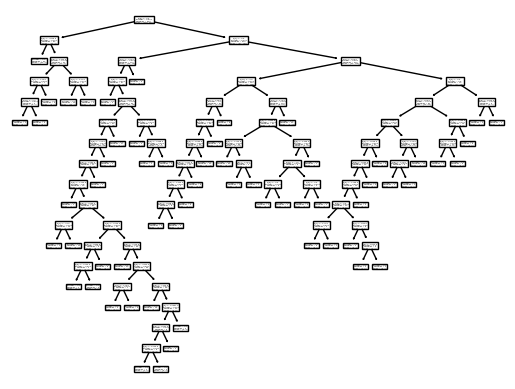

In [20]:
_ =tree.plot_tree(clf)

In [21]:
!pip install graphviz

In [22]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("dataset")

'dataset.pdf'

In [23]:
target_values = list(map(lambda x: x[1],df.set_index(["target","targetNames"]).index.unique().sort_values()))

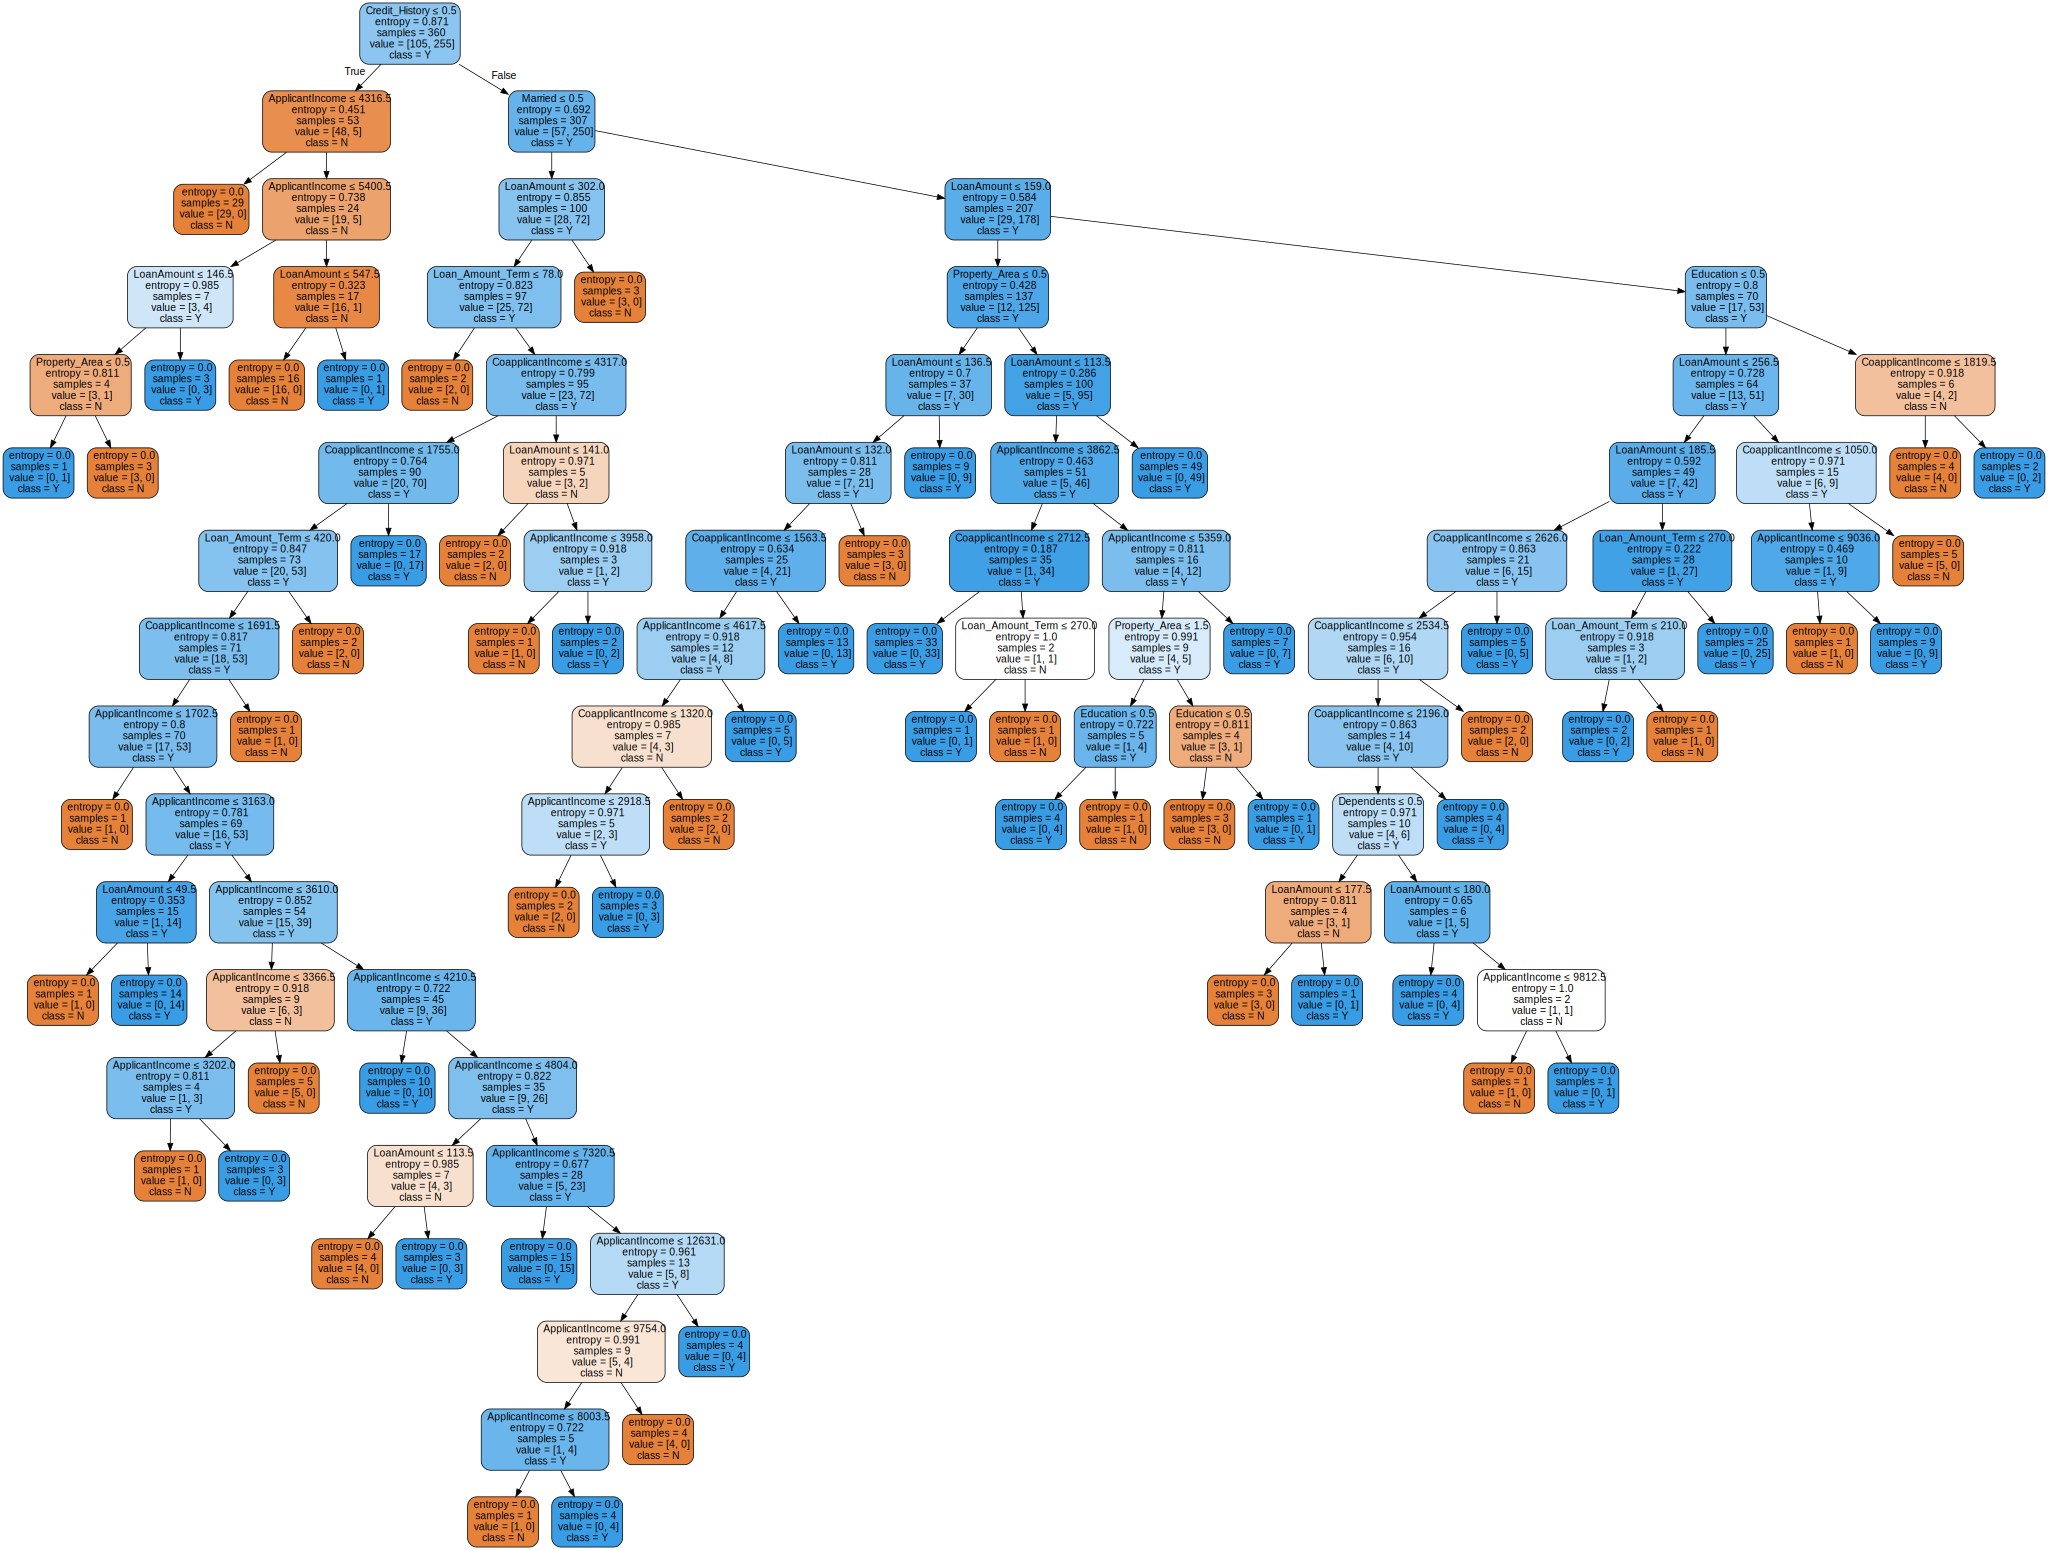

In [24]:
 dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=featuresCols,
                      class_names=target_values,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

También podemos ver el arbol mediante texto

In [25]:
from sklearn.tree import export_text

r = export_text(clf, feature_names=featuresCols)
print(r)

|--- Credit_History <= 0.50
|   |--- ApplicantIncome <= 4316.50
|   |   |--- class: 0
|   |--- ApplicantIncome >  4316.50
|   |   |--- ApplicantIncome <= 5400.50
|   |   |   |--- LoanAmount <= 146.50
|   |   |   |   |--- Property_Area <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Property_Area >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- LoanAmount >  146.50
|   |   |   |   |--- class: 1
|   |   |--- ApplicantIncome >  5400.50
|   |   |   |--- LoanAmount <= 547.50
|   |   |   |   |--- class: 0
|   |   |   |--- LoanAmount >  547.50
|   |   |   |   |--- class: 1
|--- Credit_History >  0.50
|   |--- Married <= 0.50
|   |   |--- LoanAmount <= 302.00
|   |   |   |--- Loan_Amount_Term <= 78.00
|   |   |   |   |--- class: 0
|   |   |   |--- Loan_Amount_Term >  78.00
|   |   |   |   |--- CoapplicantIncome <= 4317.00
|   |   |   |   |   |--- CoapplicantIncome <= 1755.00
|   |   |   |   |   |   |--- Loan_Amount_Term <= 420.00
|   |   |   |   |   |   |   |--- Coappl

In [26]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00


In [27]:
# el arbol es muy grande y tarda bastante, por ello mostramos como funciona esta librería con un árbol con menos profundidad
#from dtreeviz.trees import dtreeviz # remember to load the package

#viz = dtreeviz(clf, X_train, y_train,
#                target_name=targetCol,
#                feature_names=featuresCols,
#                class_names=target_values)

#viz

Veamos la feature importance del árbol

<Axes: >

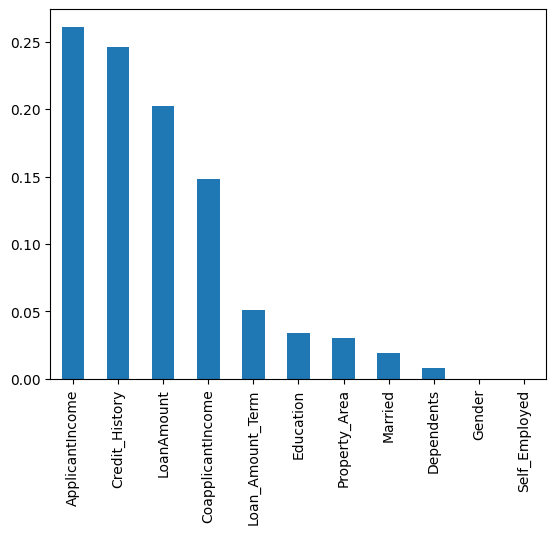

In [28]:
pd.Series(clf.feature_importances_,featuresCols).sort_values(ascending=False).plot(kind="bar")

In [29]:
# reduce overfitting

# Reducción del overfitting
Introducimos una profundidad máxima para intentar reducir el posible overfitting

In [30]:

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15 28]
 [ 7 70]]
              precision    recall  f1-score   support

           0       0.68      0.35      0.46        43
           1       0.71      0.91      0.80        77

    accuracy                           0.71       120
   macro avg       0.70      0.63      0.63       120
weighted avg       0.70      0.71      0.68       120



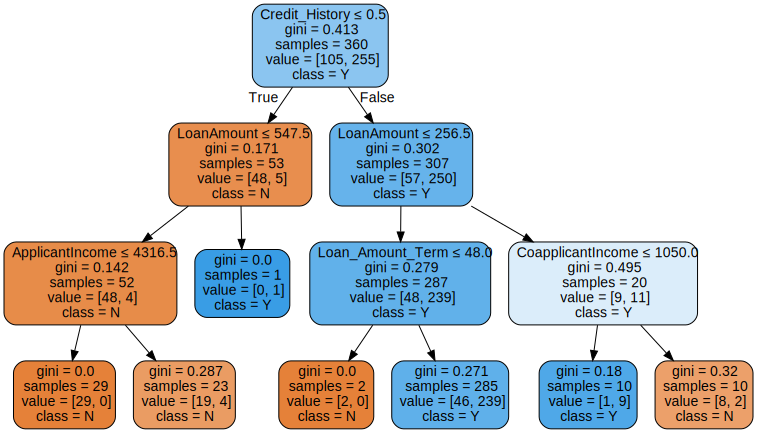

In [32]:
 dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=featuresCols,
                      class_names=target_values,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


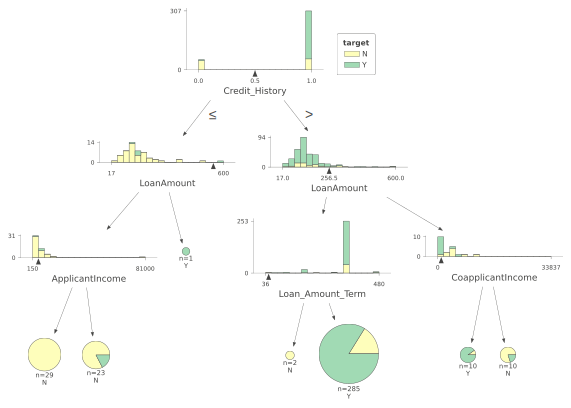

In [33]:
import dtreeviz


viz = dtreeviz.model(clf, X_train, y_train,
                target_name=targetCol,
                feature_names=featuresCols,
                class_names=target_values)

v = viz.view()
display(v)


Feature Importance

<Axes: >

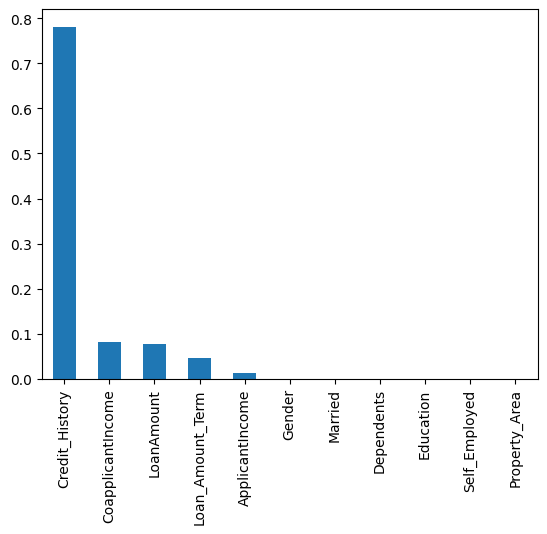

In [34]:
pd.Series(clf.feature_importances_,featuresCols).sort_values(ascending=False).plot(kind="bar")

**Ejercicio Libre 1**

Existe otro método de hacer prunning, que es usando el parámetro, ccp_alpha que por defecto está a 0. Prueba a hacer un modelo modificando este parámetro y mira cómo se modifican las métricas en el test.

**Ejercicio Libre 2**

Prueba a usar la criterio de gini en vez de la entropía y observa los diferentes resultados

**Ejercicio Libre 3**

Haz otro modelo cambiando los datos train/test simplemente modificando el random_state a 555 y plotealo. ¿ Varía mucho el árbol?

# Modelo usando randomforest
Hacemos un modelo de random forest

In [35]:
from sklearn import  ensemble

In [36]:
rf = ensemble.RandomForestClassifier(max_depth=3)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Evaluamos las métricas

In [37]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15 28]
 [ 3 74]]
              precision    recall  f1-score   support

           0       0.83      0.35      0.49        43
           1       0.73      0.96      0.83        77

    accuracy                           0.74       120
   macro avg       0.78      0.65      0.66       120
weighted avg       0.76      0.74      0.71       120



<Axes: >

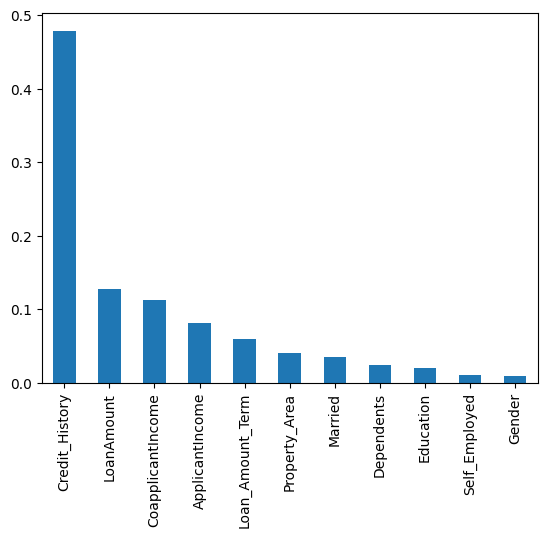

In [38]:
pd.Series(rf.feature_importances_,featuresCols).sort_values(ascending=False).plot(kind="bar")

Ejemplo de tuneo de hiperparámetros (más en siguientes sesiones...)

In [39]:
grid = {
    'n_estimators': [200,300,],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,5,7],
    'criterion' :['gini'],
    'random_state' : [18]
}

In [40]:
from sklearn.model_selection import GridSearchCV

rf_cv = GridSearchCV(estimator=ensemble.RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300], 'random_state': [18]})

In [41]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [42]:
rf_cv_best=rf_cv.best_estimator_

print(rf_cv_best)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=18)


In [43]:
y_pred = rf_cv_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15 28]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.79      0.35      0.48        43
           1       0.72      0.95      0.82        77

    accuracy                           0.73       120
   macro avg       0.76      0.65      0.65       120
weighted avg       0.75      0.73      0.70       120



Modelo usando XGboost

In [44]:
import xgboost as xgb

In [45]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [46]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [47]:

xgb.train?

In [48]:
bst = xgb.train(param, dtrain, num_round)


In [49]:
y_pred = bst.predict(dtest)

In [50]:
best_preds = np.asarray([np.argmax(line) for line in y_pred])


Evaluación de las métricas

In [51]:

print(confusion_matrix(y_test, best_preds))
print(classification_report(y_test, best_preds))

[[15 28]
 [ 6 71]]
              precision    recall  f1-score   support

           0       0.71      0.35      0.47        43
           1       0.72      0.92      0.81        77

    accuracy                           0.72       120
   macro avg       0.72      0.64      0.64       120
weighted avg       0.72      0.72      0.69       120



<Axes: xlabel='feature'>

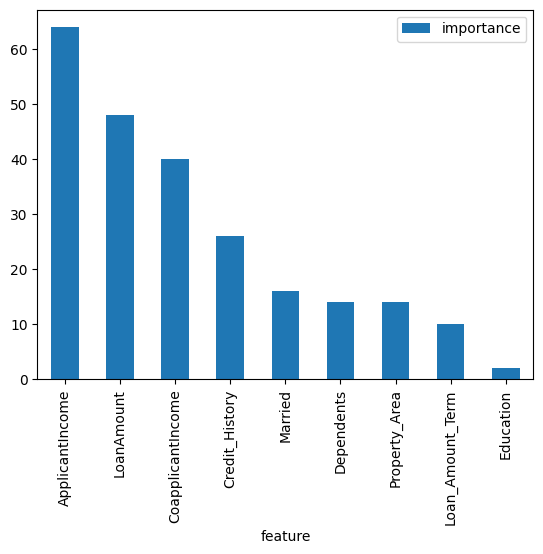

In [52]:
pd.DataFrame(bst.get_fscore().items(), columns=['feature','importance']).set_index("feature").sort_values('importance', ascending=False).plot(kind="bar")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

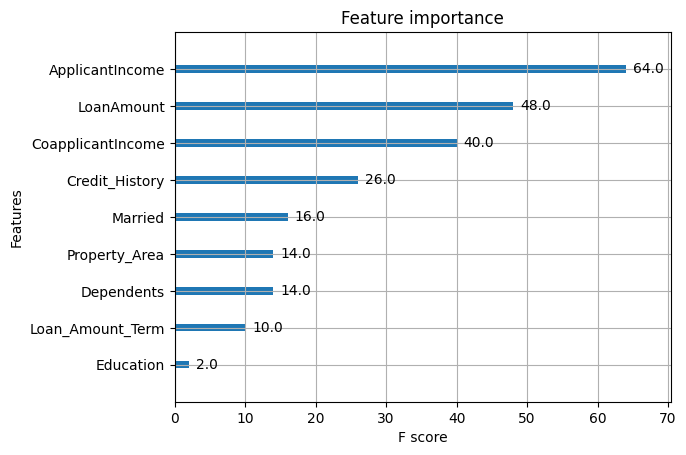

In [53]:
xgb.plot_importance(bst)


In [54]:
#cross_val=xgb.cv(params=param, dtrain=dtrain, nfold=3, num_boost_round=50, early_stopping_rounds=10,  as_pandas=True,seed=42)
#cross_val

## Catboost

In [55]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


In [56]:
import catboost as cb
categorical_indices = [0,1,2,3,4,10]

train_dataset = cb.Pool(X_train,y_train, cat_features=categorical_indices)
test_dataset = cb.Pool(X_test,y_test, cat_features=categorical_indices)

In [57]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')


In [58]:
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [50, 100, 150]}
model.grid_search(grid,train_dataset)


Streaming output truncated to the last 5000 lines.
26:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 55.8ms	remaining: 254ms
27:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 57.9ms	remaining: 252ms
28:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 59.9ms	remaining: 250ms
29:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 64.7ms	remaining: 259ms
30:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 66.7ms	remaining: 256ms
31:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 68.9ms	remaining: 254ms
32:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 71.1ms	remaining: 252ms
33:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 73.2ms	remaining: 250ms
34:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 75.4ms	remaining: 248ms
35:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 76.9ms	remaining: 244ms
36:	learn: 0.8541667	test: 0.7500000	best: 0.7500000 (0)	total: 78.8m

{'params': {'depth': 4,
  'l2_leaf_reg': 5,
  'iterations': 100,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [59]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.35      0.48        43
           1       0.72      0.95      0.82        77

    accuracy                           0.73       120
   macro avg       0.76      0.65      0.65       120
weighted avg       0.75      0.73      0.70       120



In [60]:
model.get_params()

{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 4,
 'l2_leaf_reg': 5,
 'iterations': 100,
 'learning_rate': 0.1}

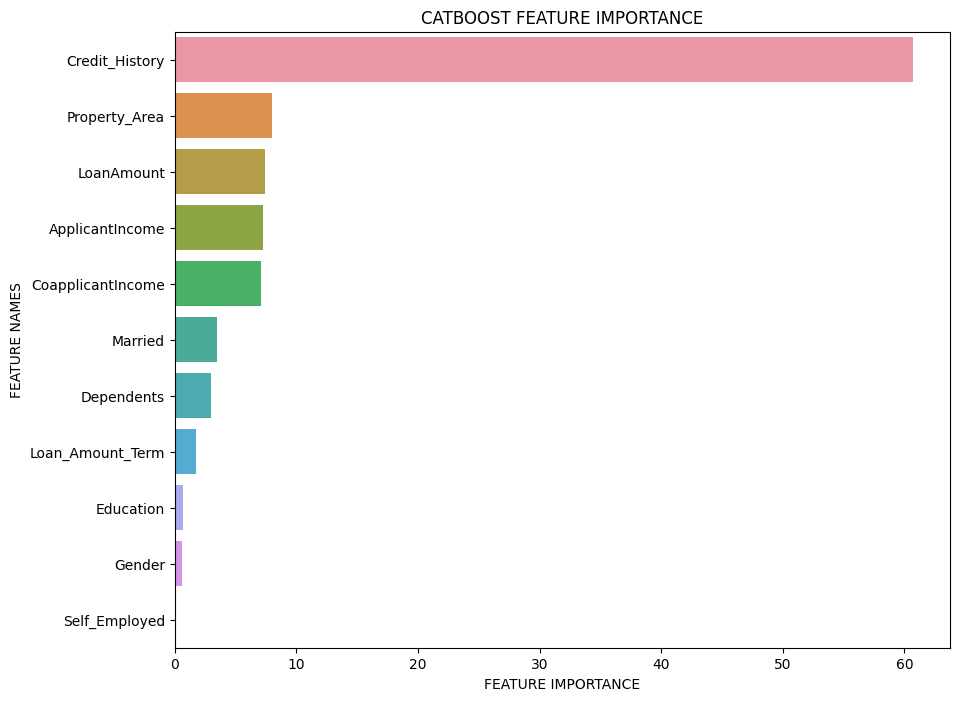

In [61]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(model.get_feature_importance(),X_train.columns,'CATBOOST')

Ejercicio. Anteriormente hemos usados datos en los que las variables categóricas habían sido tratadas. Prueba en este caso a hacer el mismo modelo de catboost con el siguiente dataset que no ha sido tratado en ese aspecto.

In [62]:
df_m = df_raw.dropna()
df_m["target"] = df_m["Loan_Status"]

<ipython-input-62-95fcacdac3ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## LightGBM

In [63]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(learning_rate=0.09,max_depth=3,random_state=42)
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 255, number of negative: 105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.708333 -> initscore=0.887303
[LightGBM] [Info] Start training from score 0.887303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(learning_rate=0.09, max_depth=3, random_state=42)

In [64]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49        43
           1       0.72      0.87      0.79        77

    accuracy                           0.70       120
   macro avg       0.68      0.63      0.64       120
weighted avg       0.69      0.70      0.68       120



In [65]:
# existe también como en los casos anteriores la posibilidad de usar train_data = lgb.Dataset(data, label=label)


# Multiples modelos
Hacemos una evaluación usando múltiples modelos con pycaret

**Ojo! es posible que haya que reiniciar el kernel si estáis en colab!**

In [66]:
#!pip install numpy==1.21.5
#!pip install pycaret==2.3.6


In [67]:
!pip install --pre pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s et

In [1]:
import pycaret
from pycaret.datasets import get_data
from pycaret.classification import *
import pandas as pd

In [2]:
url_file = "https://raw.githubusercontent.com/zng489/Decision_trees_and_Random-Forest-madfhantr-/main/madfhantr.csv"
df = pd.read_csv(url_file)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
def preprocessing_madfhantr(df):
  # eliminamos nans
  df = df.dropna()
  # creamos columna con nombres target
  df["targetNames"] = df["Loan_Status"]
  # variables categóricas que tenemos que convertir
  cat_vars = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
  for cat_var in cat_vars:
    df.loc[:,cat_var] = pd.Categorical(df[cat_var]).codes
  # renombramos la columna target
  df = df.rename(columns={"Loan_Status":"target"})
  df = df.set_index("Loan_ID")
  return df



In [4]:
targetCol = "target"
df = preprocessing_madfhantr(df).drop("targetNames",axis=1)

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [6]:
# initialize the setup
# import dataset
from sklearn.metrics import log_loss
clf = setup(df, target = targetCol,imputation_type='simple',fold = 3,train_size=0.7 )
# check all metrics used for model evaluation
get_metrics()
# add Log Loss metric in pycaret
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False)
# compare baseline models
best = compare_models()

,Description,Value
0,Session id,5696
1,Target,target
2,Target type,Binary
3,Original data shape,"(480, 12)"
4,Transformed data shape,"(480, 12)"
5,Transformed train set shape,"(336, 12)"
6,Transformed test set shape,"(144, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lr,Logistic Regression,0.8155,0.7149,0.9913,0.7934,0.8813,0.4882,0.5586,6.6509,3.1967
ridge,Ridge Classifier,0.8155,0.0000,0.9913,0.7934,0.8813,0.4882,0.5586,6.6509,0.0567
lda,Linear Discriminant Analysis,0.8155,0.7188,0.9913,0.7934,0.8813,0.4882,0.5586,6.6509,0.0900
rf,Random Forest Classifier,0.8065,0.7819,0.9610,0.7995,0.8726,0.4827,0.5262,6.9727,0.3800
catboost,CatBoost Classifier,0.8036,0.7621,0.9741,0.7905,0.8726,0.4622,0.5179,7.0800,1.8200
et,Extra Trees Classifier,0.7917,0.7729,0.9178,0.8081,0.8583,0.4656,0.4919,7.5091,0.3333
lightgbm,Light Gradient Boosting Machine,0.7917,0.7588,0.9310,0.8003,0.8604,0.4575,0.4816,7.5091,0.1533
nb,Naive Bayes,0.7857,0.7126,0.9439,0.7875,0.8585,0.4299,0.4650,7.7236,0.0967
gbc,Gradient Boosting Classifier,0.7857,0.7418,0.9308,0.7941,0.8569,0.4397,0.4646,7.7236,0.1867
xgboost,Extreme Gradient Boosting,0.7768,0.7626,0.9009,0.8016,0.8479,0.4327,0.4461,8.0455,0.1533


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [7]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Más info: https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb